In [140]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [153]:
# Load different datasets

amazon = pd.read_csv('amazon_cells_labelled.txt', delimiter='\t', header=None)
yelp = pd.read_csv('yelp_labelled.txt', delimiter='\t', header=None)
imdb = pd.read_csv('imdb_labelled.txt', delimiter='\t', header=None)

In [154]:
# Key words for a negative review based off of most used words
keywords = ['bad', 'terrible', 'no', 'died', 'disappointed', 'not', "don't", "doesn't", 'waste', 'worst',
       'poor', 'few', 'worst', 'never', 'stupid', 'awful', 'worse', 'poor', 'problem', 'fail',
           'useless', 'broke', 'problems', 'broken', 'failure']


In [155]:
# give columns names
amazon.columns = ['message', 'rating']
yelp.columns = ['message', 'rating']
imdb.columns = ['message', 'rating']

In [173]:
# Function that will produce a heatmap and test the model?
def analysis(dataset):
    # check to see if keywords are in message
    for key in keywords:
        dataset[str(key)] = dataset.message.str.contains(' ' + str(key) + ' ', case=False)

    # Change rating to a Boolean 
    dataset['rating'] = (dataset['rating'] == 0)

    # generate heatmap
    sns.set_style('darkgrid')
    plt.figure(figsize=(12,8))
    sns.heatmap(dataset.corr())
    plt.show()

    # separate data into testing and training 
    data = dataset[keywords]
    target = dataset['rating']

    # Run BernoulliNB
    print()
    print('Bernoulli NB')
    bnb = BernoulliNB()
    bnb.fit(data, target)
    y_pred = bnb.predict(data)
    print('Number of mislabeled points out of a total {} points: {}'.format(
        data.shape[0],
        (target != y_pred).sum()
    ))
    print('Testing on Sample: ', str(bnb.fit(data, target).score(data, target)))
    print()

    for i in range(10,100, 10):
        x_train, x_test, y_train, y_test = train_test_split(data, target, 
                                                            test_size=(i/100),
                                                           random_state=i)
        print('Testing with {}% Hold: '.format(i), str(bnb.fit(x_train, y_train).score(x_test, y_test)))
        y_pred = bnb.fit(x_train, y_train).predict(data)
        print(confusion_matrix(target, y_pred))
        print()

    

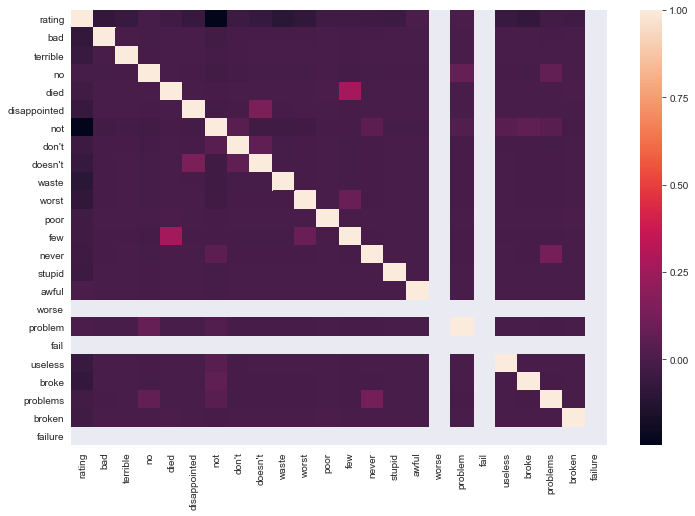


Bernoulli NB
Number of mislabeled points out of a total 1000 points: 373
Testing on Sample:  0.627

Testing with 10% Hold:  0.55
[[151 349]
 [ 25 475]]

Testing with 20% Hold:  0.615
[[155 345]
 [ 28 472]]

Testing with 30% Hold:  0.6033333333333334
[[154 346]
 [ 27 473]]

Testing with 40% Hold:  0.585
[[139 361]
 [ 22 478]]

Testing with 50% Hold:  0.616
[[149 351]
 [ 25 475]]

Testing with 60% Hold:  0.6083333333333333
[[150 350]
 [ 27 473]]

Testing with 70% Hold:  0.6014285714285714
[[149 351]
 [ 29 471]]

Testing with 80% Hold:  0.61
[[139 361]
 [ 22 478]]

Testing with 90% Hold:  0.6066666666666667
[[126 374]
 [ 17 483]]



In [174]:
analysis(amazon)

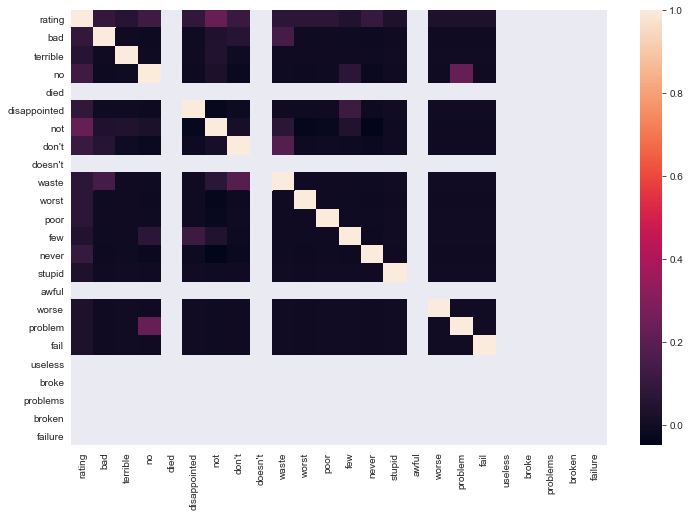


Bernoulli NB
Number of mislabeled points out of a total 1000 points: 356
Testing on Sample:  0.644

Testing with 10% Hold:  0.67
[[474  26]
 [330 170]]

Testing with 20% Hold:  0.6
[[474  26]
 [331 169]]

Testing with 30% Hold:  0.6266666666666667
[[474  26]
 [330 170]]

Testing with 40% Hold:  0.6175
[[474  26]
 [332 168]]

Testing with 50% Hold:  0.628
[[474  26]
 [337 163]]

Testing with 60% Hold:  0.655
[[474  26]
 [332 168]]

Testing with 70% Hold:  0.6357142857142857
[[476  24]
 [335 165]]

Testing with 80% Hold:  0.61875
[[476  24]
 [349 151]]

Testing with 90% Hold:  0.46555555555555556
[[  0 500]
 [ 16 484]]



In [168]:
analysis(yelp)

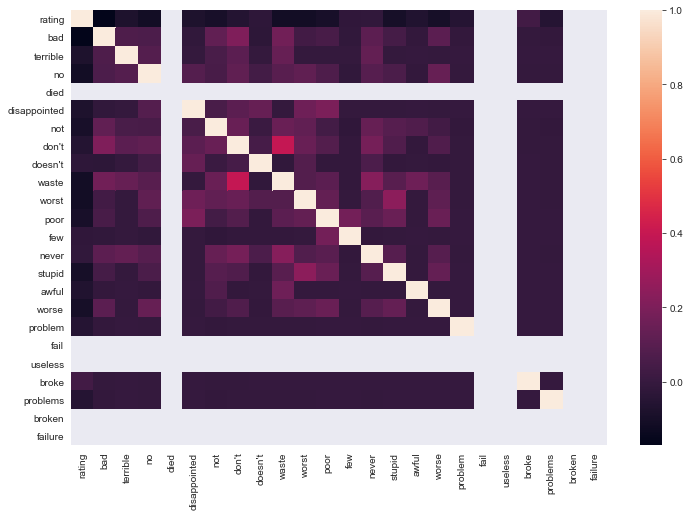


Bernoulli NB
Number of mislabeled points out of a total 748 points: 274
Testing on Sample:  0.6336898395721925

Testing with 10% Hold:  0.72
[[113 249]
 [ 25 361]]

Testing with 20% Hold:  0.6066666666666667
[[118 244]
 [ 32 354]]

Testing with 30% Hold:  0.5955555555555555
[[112 250]
 [ 25 361]]

Testing with 40% Hold:  0.6333333333333333
[[104 258]
 [ 21 365]]

Testing with 50% Hold:  0.6229946524064172
[[110 252]
 [ 23 363]]

Testing with 60% Hold:  0.6013363028953229
[[117 245]
 [ 35 351]]

Testing with 70% Hold:  0.6221374045801527
[[ 94 268]
 [ 21 365]]

Testing with 80% Hold:  0.6043405676126878
[[ 84 278]
 [  9 377]]

Testing with 90% Hold:  0.5296735905044511
[[ 26 336]
 [  5 381]]



In [169]:
analysis(imdb)

In terms of overfitting, whenever there is an extreme hold (either 10% or 90%) there seems to be overfitting. The best performances seem to have come from 